In [2]:
pip install termcolor


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=15cf7518990f3230c69fe949d25f3a0aa1b6b142c26ee809b7470ebe6046efec
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score
from termcolor import colored
import warnings
warnings.filterwarnings("ignore")

In [4]:
n_estimators = 100
max_depth = 1
bootstrap = 'True'
metrics_list = 'Confusion Matrix'

In [18]:
data = pd.read_csv('file1.csv')
print(colored('Overview of Dataset', 'green', attrs=['bold']))
def load_data():
    label = LabelEncoder()
    for col in data.columns:
        data[col] = label.fit_transform(data[col])
    return data
def split(df):
    x= df[['nor_age_first_funding_year', 'nor_age_last_funding_year', 
            'nor_age_first_milestone_year', 'nor_age_last_milestone_year', 'nor_relationships',
            'nor_funding_rounds', 'nor_funding_total_usd', 'nor_milestones', 'is_CA', 'is_NY',
            'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 
            'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 
            'is_consulting', 'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 
            'has_roundC', 'has_roundD', 'nor_avg_participants', 'is_top500', 'nor_age']]
    y = df['labels']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)  
    return x_train, x_test, y_train, y_test
def plot_metrics(metrics_list):
        if 'Confusion Matrix' in metrics_list:
            plot_confusion_matrix(model, x_test, y_test, display_labels=class_names)
            plt.title("Confusion Matrix")
            plt.show()
        if 'ROC Curve' in metrics_list:
            plot_roc_curve(model, x_test, y_test)
            plt.title("ROC Curve")
            plt.show()
        if 'Precision-Recall Curve' in metrics_list:
            plot_precision_recall_curve(model, x_test, y_test)
            plt.title("Precision-Recall Curve")
            plt.show()

Overview of Dataset


In [20]:
df = load_data()
x_train, x_test, y_train,y_test = split(df)
class_names = [1, 0]

In [21]:
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,bootstrap=bootstrap,n_jobs=-1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [22]:
print("Accuracy: ", accuracy_score(y_test,y_pred).round(2))

Accuracy:  0.69


Precison:  0.68
Recall:  0.99


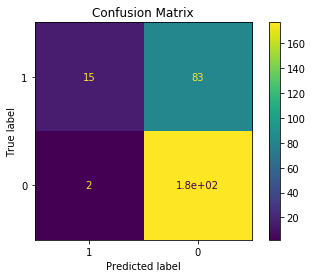

In [23]:
print("Precison: ", precision_score(y_test, y_pred, labels=class_names).round(2))
print("Recall: ",recall_score(y_test, y_pred, labels=class_names).round(2))
plot_metrics(metrics_list)